# Agent Skills Example (PandasAI v3.0.0)

This notebook demonstrates how to use custom skills with an `Agent` in PandasAI v3.0.0.

**Key Points:**
- Skills are automatically registered when you use the `@pai.skill` decorator
- Skills are available globally - no need to manually add them to the agent
- Skills can work with DataFrame columns, perform calculations, format data, and more


## 1. Setup and Configuration

## 2. Prepare Data

## 3. Define Custom Skills


In [17]:
import os
from pandasai_litellm.litellm import LiteLLM
from pandasai import Agent
import pandasai as pai
import pandas as pd

# Configure LLM and PandasAI
api_key = os.getenv("OPENAI_API_KEY", "your-api-key")
llm = LiteLLM(model="gpt-5-mini", api_key=api_key)

pai.config.set({
    "llm": llm,
    "save_logs": True,
    "max_retries": 3
})


In [18]:
# Prepare employee payroll data
payroll_raw = pd.DataFrame([
    {"employee": "Alice", "role": "AE", "salary": 90000,
        "performance": 0.92, "region": "US"},
    {"employee": "Boris", "role": "AE", "salary": 85000,
        "performance": 0.88, "region": "EU"},
    {"employee": "Chen", "role": "CSM", "salary": 78000,
        "performance": 0.95, "region": "APAC"},
    {"employee": "Diana", "role": "CSM", "salary": 82000,
        "performance": 0.91, "region": "US"},
])

# Convert to PandasAI DataFrame with semantic information
payroll_df = pai.DataFrame(
    payroll_raw,
    name="employee_payroll",
    description="Employee compensation and performance metrics by region"
)

In [19]:
# Define custom skills using the @pai.skill decorator
# Skills are automatically registered globally and available to all agents
from pandasai.ee.skills.manager import SkillsManager
SkillsManager.clear_skills()


@pai.skill
def calculate_bonus(salary: float, performance: float) -> float:
    """Calculate employee bonus based on salary and performance score.
    
    Formula: bonus = salary * performance * 0.2
    """
    return round(salary * performance * 0.2, 2)


@pai.skill
def format_currency(value: float, currency: str = "USD") -> str:
    """Format a numeric value as a currency string."""
    return f"{value:,.0f} {currency}"


@pai.skill
def get_performance_category(performance: float) -> str:
    """Categorize performance score into levels.
    
    Returns: 'Excellent' (>=0.95), 'Good' (>=0.85), 'Average' (>=0.75), 'Below Average' (<0.75)
    """
    if performance >= 0.95:
        return "Excellent"
    elif performance >= 0.85:
        return "Good"
    elif performance >= 0.75:
        return "Average"
    else:
        return "Below Average"


@pai.skill
def get_employee_stats(df) -> dict:
    """Get employee statistics including count and unique roles."""
    return {"count": len(df), "roles": sorted(df["role"].unique())}


@pai.skill
def plot_salaries(df):
    """Plot average salaries by role as a bar chart."""
    return df.groupby("role")["salary"].mean().plot(kind="bar")


@pai.skill
def my_custom_function(region: str) -> str:
    """Apply custom logic for a given region."""
    return f"Custom logic for {region}"


@pai.skill
def my_skill(message: str) -> str:
    """Acknowledge a message with skill response."""
    return f"Skill acknowledged: {message}"


@pai.skill
def test_skill(value: float) -> float:
    """Test skill that multiplies value by 1.1."""
    return value * 1.1


## 4. Use Skills with Agent

Now let's create an agent and use our custom skills. All skills defined with `@pai.skill` are automatically available to the agent.

In [20]:
# Initialize Agent (skills are automatically available - no need to add them manually)
agent = Agent([payroll_df])

# Example 1: Calculate bonuses using the calculate_bonus skill
response = agent.chat("Calculate the bonus for each employee")
print("Example 1: Calculate bonuses")
print(response)
print("\n" + "="*60 + "\n")


Example 1: Calculate bonuses
  employee role  salary  performance region    bonus bonus_formatted  \
0    Alice   AE   90000         0.92     US  16560.0      16,560 USD   
1    Boris   AE   85000         0.88     EU  14960.0      14,960 USD   
2    Diana  CSM   82000         0.91     US  14924.0      14,924 USD   
3     Chen  CSM   78000         0.95   APAC  14820.0      14,820 USD   

  performance_category  
0                 Good  
1                 Good  
2                 Good  
3            Excellent  




In [21]:
# Example 2: Categorize performance using the get_performance_category skill
response = agent.chat("Add a performance category column for each employee")
print("Example 2: Performance categories")
print(response)
print("\n" + "="*60 + "\n")


Example 2: Performance categories
  employee role  salary  performance region performance_category    bonus  \
0     Chen  CSM   78000         0.95   APAC            Excellent  14820.0   
1    Alice   AE   90000         0.92     US                 Good  16560.0   
2    Diana  CSM   82000         0.91     US                 Good  14924.0   
3    Boris   AE   85000         0.88     EU                 Good  14960.0   

  bonus_formatted  
0      14,820 USD  
1      16,560 USD  
2      14,924 USD  
3      14,960 USD  




In [22]:
# Example 3: Use multiple skills together
response = agent.chat(
    "Calculate bonuses for each employee, format them as currency using USD, "
    "and show the results sorted by bonus amount"
)
print("Example 3: Multiple skills combined")
print(response)
print("\n" + "="*60 + "\n")


Example 3: Multiple skills combined
  employee role  salary  performance    bonus bonus_formatted region
0    Alice   AE   90000         0.92  16560.0      16,560 USD     US
1    Boris   AE   85000         0.88  14960.0      14,960 USD     EU
2    Diana  CSM   82000         0.91  14924.0      14,924 USD     US
3     Chen  CSM   78000         0.95  14820.0      14,820 USD   APAC




In [23]:
# Example 4: Get employee statistics using get_employee_stats skill
response = agent.chat("Get employee statistics including count and roles")
print("Example 4: Employee statistics")
print(response)
print("\n" + "="*60 + "\n")


Example 4: Employee statistics
  region  total_employees  distinct_roles                   roles  avg_salary  \
0    ALL                4               2  (CSM, ', '),(AE, ', ')     83750.0   
1     US                2               2  (CSM, ', '),(AE, ', ')     86000.0   
2   APAC                1               1             (CSM, ', ')     78000.0   
3     EU                1               1              (AE, ', ')     85000.0   

   avg_performance  
0            0.915  
1            0.915  
2            0.950  
3            0.880  




Example 5: Salary visualization
Unfortunately, I was not able to get your answer. Please try again.




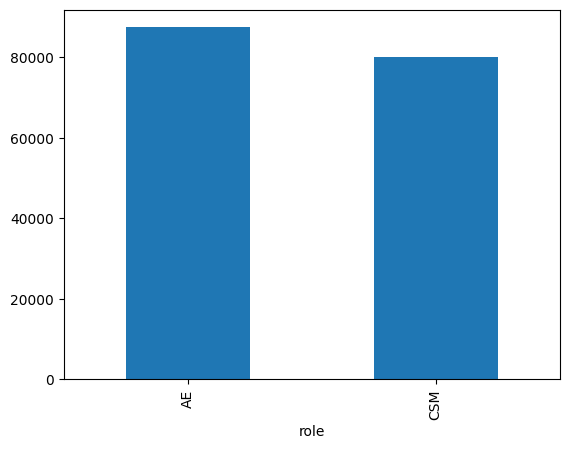

In [24]:
# Example 5: Plot salaries using plot_salaries skill
response = agent.chat("Plot average salaries by role as a bar chart")
print("Example 5: Salary visualization")
print(response)
print("\n" + "="*60 + "\n")


In [25]:
# Example 6: Use my_custom_function skill
response = agent.chat("Apply custom logic for region 'US'")
print("Example 6: Custom function")
print(response)
print("\n" + "="*60 + "\n")


Example 6: Custom function
  region role  count  avg_salary avg_salary_formatted  avg_perf  \
0     US   AE      1     90000.0           90,000 USD      0.92   
1     US  CSM      1     82000.0           82,000 USD      0.91   

  performance_category top_earner  top_earner_salary  \
0                 Good      Alice              90000   
1                 Good      Diana              82000   

  top_earner_salary_formatted    bonus bonus_formatted          region_note  
0                  90,000 USD  16560.0      16,560 USD  Custom logic for US  
1                  82,000 USD  14924.0      14,924 USD  Custom logic for US  




In [26]:
# Example 7: Use my_skill
response = agent.chat("Run my_skill with the message 'HelloWorld'")
print("Example 7: Message skill")
print(response)
print("\n" + "="*60 + "\n")


Example 7: Message skill
Skill acknowledged: HelloWorld




In [27]:
# Example 8: Use test_skill
response = agent.chat("Apply test_skill to multiply salary by 1.1 for Alice")
print("Example 8: Test skill")
print(response)


Example 8: Test skill
99000.0


## 5. Additional Examples

You can create skills for various purposes: data transformations, calculations, formatting, and more.


In [28]:
# Example: Skill that works with sales data
sales_raw = pd.DataFrame([
    {"region": "EU", "channel": "Online", "revenue": 125000,
        "units": 420, "week": "2024-01-05"},
    {"region": "US", "channel": "Retail", "revenue": 174000,
        "units": 510, "week": "2024-01-05"},
    {"region": "APAC", "channel": "Online", "revenue": 98000,
        "units": 360, "week": "2024-01-12"},
])

sales_df = pai.DataFrame(
    sales_raw,
    name="global_sales",
    description="Aggregated weekly sales by region and channel"
)

# Define a skill for sales metrics (also known as calculate_metric in original)
@pai.skill
def calculate_revenue_per_unit(revenue: float, units: int) -> float:
    """Calculate revenue per unit sold (average selling price)."""
    return round(revenue / max(units, 1), 2)

# Create agent with sales data
sales_agent = Agent([sales_df])

# Use the skill
response = sales_agent.chat("Calculate revenue per unit for each row")
print("Sales Example: Revenue per unit")
print(response)


Sales Example: Revenue per unit
  region channel  revenue  units        week  revenue_per_unit
0     EU  Online   125000    420  2024-01-05        297.619048
1     US  Retail   174000    510  2024-01-05        341.176471
2   APAC  Online    98000    360  2024-01-12        272.222222


In [29]:
from pandasai.ee.skills.manager import SkillsManager

SkillsManager.get_skills()


[SkillType(func=<function calculate_bonus at 0x306841b20>, description='Calculate employee bonus based on salary and performance score.\n\n    Formula: bonus = salary * performance * 0.2\n    ', name='calculate_bonus'),
 SkillType(func=<function format_currency at 0x306eeaac0>, description='Format a numeric value as a currency string.', name='format_currency'),
 SkillType(func=<function get_performance_category at 0x3068c7060>, description="Categorize performance score into levels.\n\n    Returns: 'Excellent' (>=0.95), 'Good' (>=0.85), 'Average' (>=0.75), 'Below Average' (<0.75)\n    ", name='get_performance_category'),
 SkillType(func=<function get_employee_stats at 0x306ee84a0>, description='Get employee statistics including count and unique roles.', name='get_employee_stats'),
 SkillType(func=<function plot_salaries at 0x306ee94e0>, description='Plot average salaries by role as a bar chart.', name='plot_salaries'),
 SkillType(func=<function my_custom_function at 0x306ee9580>, descri

In [30]:
SkillsManager.clear_skills()
SkillsManager.get_skills()


[]